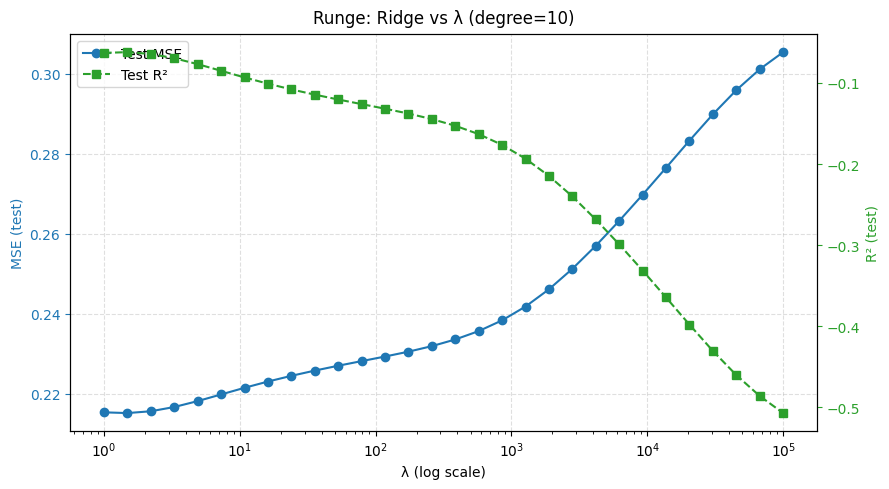

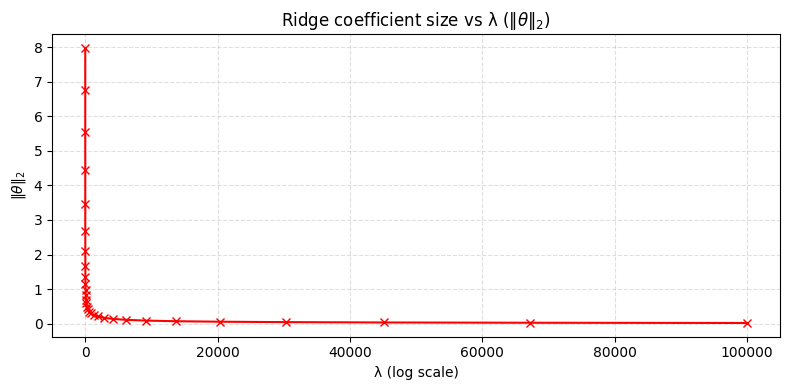

In [13]:
# --- Part (b): Ridge regularization ---

import numpy as np
import sys, pathlib
# Project-1 folder (parent of this Notebooks/ folder)
proj_dir = pathlib.Path.cwd().parent
if str(proj_dir) not in sys.path:
    sys.path.insert(0, str(proj_dir))

# Figures folder
fig_dir = proj_dir / "Figures"
fig_dir.mkdir(parents=True, exist_ok=True)

from Code.data import make_data, build_features, split_and_scale
from Code.models import sweep_ridge
from Code.plots import plot_ridge_curves, plot_theta_norms

# data (same as a)
x, y = make_data(n=100, noise_sd=0.5, seed=42)
deg_max = 15
X_full = build_features(x, degree=deg_max, include_bias=False)

# Ridge vs lambda (fixed degree)
p_fixed = 10
lambdas = np.logspace(0, 5, 30)

mse_r, r2_r, norms_r = sweep_ridge(
    X_full, y, split_func=split_and_scale,
    degree=p_fixed, lambdas=lambdas, n_factor=True
)

# plots for (b)
plot_ridge_curves(lambdas, mse_r, r2_r, title=f"Runge: Ridge vs λ (degree={p_fixed})", savepath=fig_dir / "runge_ridge_mse_r2_vs_lambda.png")
plot_theta_norms(
    lambdas, norms_r,
    xlabel="λ (log scale)",
    title=r"Ridge coefficient size vs λ ($\|\theta\|_2$)",
    savepath=fig_dir / "runge_ridge_theta_norms_vs_lambda.png"
)
